## Agenda
<ul>
<li><a href="#sources">Sources</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis and some Feature Engineering</a></li>
<li><a href="#finale">Final Touch ( Before Modeling )</a></li>
<li><a href="#unbal">Working on unbalanced data</a></li>
<li><a href="#bal">Working on balanced data</a></li>
<li><a href="#conc">Conclusion</a></li>
</ul>

<a id='sources'></a>
# Sources
[Telco Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn)

#### Some of these ideas are ispired by [Muslum Polat](https://www.kaggle.com/muslump/telco-customer-churn-analysis?fbclid=IwAR0gRroMTTbjUQCzxf6Rp2FxDVu4n16pTRTcRPnCr9mqRzbu6hF0AZM5bz4)

In [1]:
# For Loading and Manipulating the data
import numpy as np
import pandas as pd
from itertools import combinations

# For splitting, scaling and upsampling the data respectively
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# For Evaluation 
from sklearn.metrics import classification_report, confusion_matrix


# For Visualization Purposes 
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# To display all the columns ( regardless of their number or their width )
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# To change the style of the plots ( so that we all can see the same thing :) )
plt.style.use('seaborn')

In [2]:
churn_df = pd.read_csv('data.csv')

<a id='cleaning'></a>
# Data Cleaning

### First let's take a look at the data to know how to clean it

Overall check on columns

In [3]:
churn_df.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


A closer look on columns types and also if there is any missing values

In [4]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7043 non-null   object 
 1   Gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   Tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Before going on We can see that "TotalCharges" has an object type despite the fact that it's a numeric feature.

_Let's test what i call **"Hidden NaNs"**_

In [5]:
" " in churn_df.values

True

> It looks like that we have bad hidden NaNs in our dataset :). We will deal with them later.

Statistical Summary

In [6]:
churn_df.describe().drop(columns='SeniorCitizen') # I droped SeniorCitizen from statistical description 
                                                  # as it will be considered a numeric column

,Tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


Checking Duplicates

In [7]:
churn_df.duplicated().sum()

0

#### Summary: 
> ##### We can see that there are:
   - _Useless columns_  : "CustomerID"
   - _Hidden NaNs_ : " "
   - _Wrong-format Columns_ : 
      - _toObject_ : "SeniorCitizen"	( that is not important but i like it to be 'Yes' and 'No' )
      - _toFloat_  : "TotalCharges"

_Useless Columns_

In [8]:
churn_df.drop(columns='CustomerID', inplace=True)

**Test**

In [9]:
churn_df.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

_Hidden NaNs_

In [10]:
churn_df.replace(' ', np.nan, inplace=True)

**Test**

In [11]:
churn_df.isnull().sum()

Gender               0
SeniorCitizen        0
Partner              0
Dependents           0
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

> we can see that there are 11 missing values in "TotalCharges" column ... Let's take a closer look at them.

In [12]:
churn_df[churn_df['TotalCharges'].isnull()]

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Before deciding what to do...

In [13]:
churn_df.shape

(7043, 20)

In [14]:
churn_df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

> We can see that all the missing values have Churn = 'No'. Moreover, we can see that 'No's are more than 'Yes' ( In General the data is relatively large ). So I think dropping these 11 missing values will not affect the data dramatically.

In [15]:
churn_df.dropna(inplace=True)

**Test**

In [16]:
churn_df.isnull().sum()

Gender              0
SeniorCitizen       0
Partner             0
Dependents          0
Tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

_Wrong-format Columns_

In [17]:
# toObject               
churn_df["SeniorCitizen"] = churn_df["SeniorCitizen"].map({1:'Yes', 0:'No'})    

# toFloat
churn_df["TotalCharges"]  = churn_df["TotalCharges"].astype(float) 

**Test**

In [18]:
churn_df["SeniorCitizen"].unique()

array(['No', 'Yes'], dtype=object)

In [19]:
churn_df["TotalCharges"].dtype

dtype('float64')

<font color='green'>
<h2><center> Now I think it is clean now :) </center></h2>

<a id='eda'></a>
# Now it's time for some Exploration

<font color='blue'>
    <h5> Some Helping Functions </h5>

In [20]:
def CountPlot(dataFrame, x, hue=None, ax=None):
    # Main plot
    ax = sns.countplot(data=dataFrame, x=x, hue=hue, ax=ax)
    
    ## Adding Annotation 
    # Total number of clients
    n_clients = dataFrame.shape[0]
    
    # Looping over each column
    for p in ax.patches:

        loc    = p.get_x()
        height = p.get_height()
        width  = p.get_width()
        pct    = '({:0.2f}%)'.format(100*height/n_clients)
        
        # Adding the exact height at the top
        ax.text(loc+width/2, height+3 , str(height), weight = 'bold',ha="center", fontsize=15)
        
        # Adding the percentage wrt the total number of clients at the middle of each column
        ax.text(loc+width/2, int(0.5*height), pct, weight = 'bold',ha="center", fontsize=15, color='w')
        
    # Adding title
    ax.set_title(f"{x} Distribution", fontsize=25, color='brown')
    
    # Before editing the ticks we need to draw the plot first
    plt.draw()
    
    # Editing axes labels and ticks
    ax.set_xlabel(x, fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
        
    ax.set_ylabel('Number of Users', fontsize=20)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=15);
        
    # Adding legend
    if hue:
        ax.legend(labels=list(dataFrame[hue].unique()),  prop={"size":20}, frameon=True, shadow=True);

In [21]:
def ScatterPlot(dataFrame, x, y, hue=None, ax=None):
    # Main plot
    ax = sns.scatterplot(data=dataFrame, x=x, y=y, hue=hue, ax=ax, alpha=0.7)
    
    # Adding title
    corr = dataFrame[x].corr(dataFrame[y])
    ax.set_title(f"{x} with {y} by {hue}\n (Corr = {round(corr, 2)})", fontsize=25, color='brown')
    
    # Before editing the ticks we need to draw the plot first
    plt.draw()
    
    # Editing axes labels
    ax.set_xlabel(x, fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
    
    ax.set_ylabel(y, fontsize=20)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=15);
    
    # Adding legend
    if hue:
        ax.legend(prop={"size":13}, frameon=True, shadow=True);

In [22]:
def kdeplot_churn(dataFrame, col, ax=None):
    # Main plot
    ax = sns.kdeplot(dataFrame[col][dataFrame["Churn"] == 'Yes'], color="Red", ax=ax, shade=True)
    ax = sns.kdeplot(dataFrame[col][dataFrame["Churn"] == 'No'], color="Blue", ax=ax, shade=True)
    
    # Adding title
    ax.set_title(f"Distribution of {col} by churn", fontsize=17, color='brown')
    
    # Before editing the ticks we need to draw the plot first
    plt.draw()
    
    # Editing axes labels
    ax.set_xlabel(col, fontsize=15)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=15)
    
    ax.set_ylabel('Density', fontsize=15)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=15)
    
    # Adding legend
    ax.legend(["Churn","Not Churn"], loc='upper right', frameon=True, shadow=True);

First let's **"Churn"** distribution

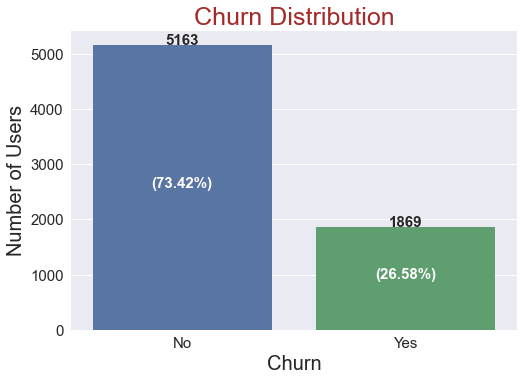

In [23]:
CountPlot(churn_df, 'Churn')

> It looks like that this data is **Imbalanced**

Before dive deeper in exploration phase let's first **divide** our data into three dataframes:
- Demographic 
- Services 
- Account

In [24]:
Demographic_cols = ['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Churn']
Services_cols    = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn']
Account_cols_cat = ['Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
Account_cols_num = ['Tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

### Demographic Features...

#### Univariate Exploration 

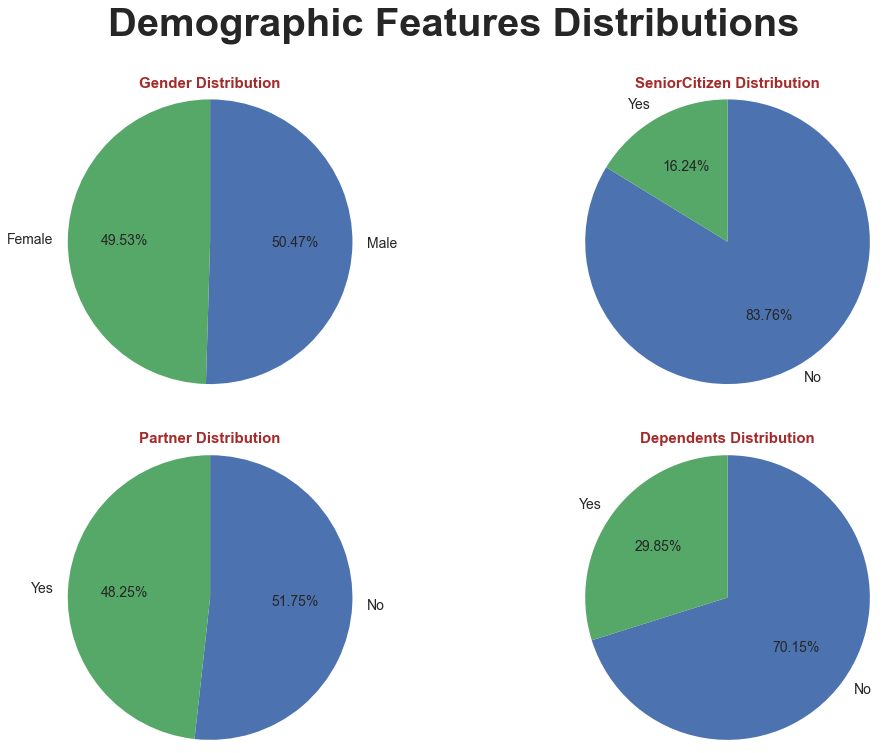

In [25]:
fig = plt.figure(figsize=(17, 12))
fig.suptitle('Demographic Features Distributions', fontsize=40, weight='bold')
for i, col in enumerate(Demographic_cols[:-1]):
    sorted_counts = churn_df[col].value_counts()
    plt.subplot(2, 2, i+1)
    plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct='%1.2f%%', 
                 counterclock = False, radius = 1.2, textprops={'fontsize': 14})
    plt.title(f'{col} Distribution',fontsize=15, weight='bold', color='brown', loc='center')

> Summary:
- there is a balance in Gender and Partner columns.
- But on the other hand the majority of people are young and have no dependents. So we should take this imbalance into our consideration when we judge the upcoming results.

#### Bivariate Exploration

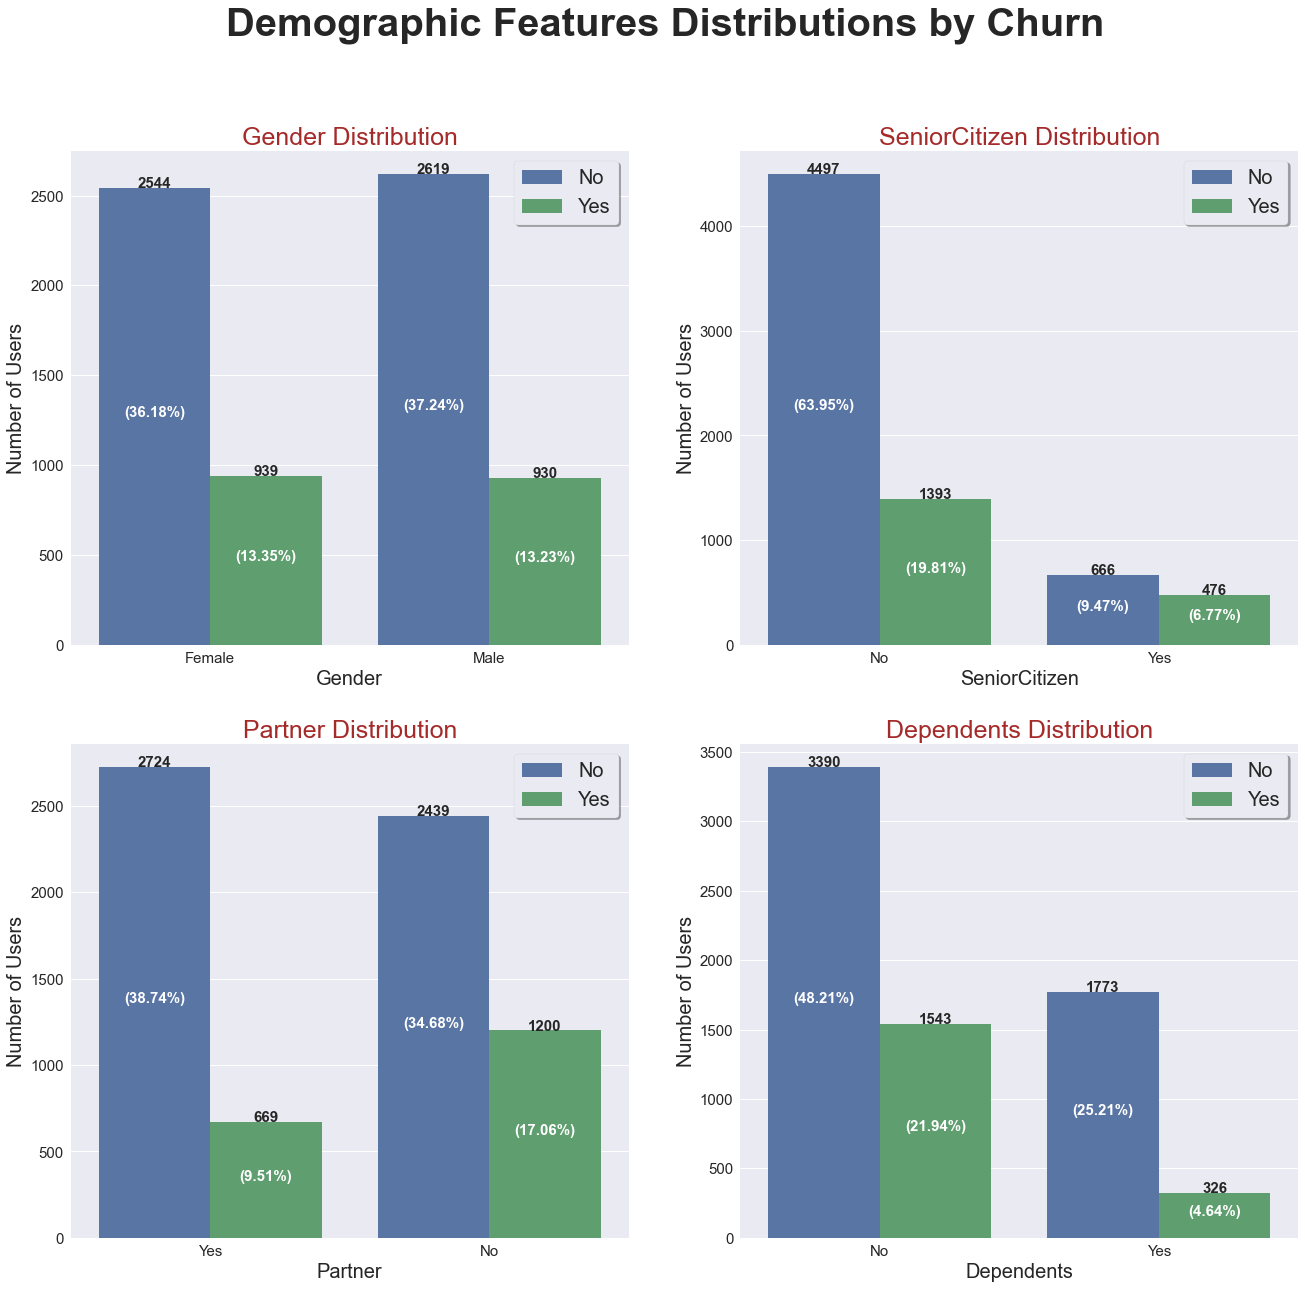

In [26]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (22,20))
fig.suptitle('Demographic Features Distributions by Churn', fontsize=40, weight='bold')
for i, col in enumerate(Demographic_cols[:-1]):
    CountPlot(churn_df[Demographic_cols], col, hue="Churn", ax=axes[i//2, i-(i//2)*2])

> **We can see that:**
- The churn rate :
   - Is very close for both Male and Female.
   - Is high for Senior Clients ($\frac{476}{476+666} = {41.68}\% $) compared to Younger ones ($\frac{1393}{1393+4497} = {23.65}\% $)
   - Is high for Clients that have no partner ($\frac{1200}{1200+2439} = {32.98}\% $) compared to the ones that have a partner ($\frac{669}{669+2724} = {19.72}\% $)
   - Also here is high for Clients that have no dependents ($\frac{1543}{1543+3390} = {31.28}\% $) compared to the ones that have a dependent ($\frac{326}{326+1773} = {15.53}\% $)

### Feature Engineering For Demographic Features

In [27]:
# I just need, for now, to convert the Gender column to ones and zeros
churn_df['Gender'] = np.where(churn_df['Gender'] == 'Male', 1, 0)

# Detect if the client has neither Partner nor Dependents
churn_df['NoDep_NoPart'] = np.where((churn_df['Partner'] == 'No')|(churn_df['Dependents'] == 'No'), 1, 0)

# Senior or not
churn_df['SeniorCitizen'] = np.where((churn_df['SeniorCitizen'] == 'Yes'), 1, 0)

Let's drop "Partner" and "Dependents" columns

In [28]:
# Dropping the unnecessary columns ( according to the above analysis )
churn_df.drop(columns=["Partner", "Dependents"], inplace=True)

### Services Features...

#### Univariate Exploration

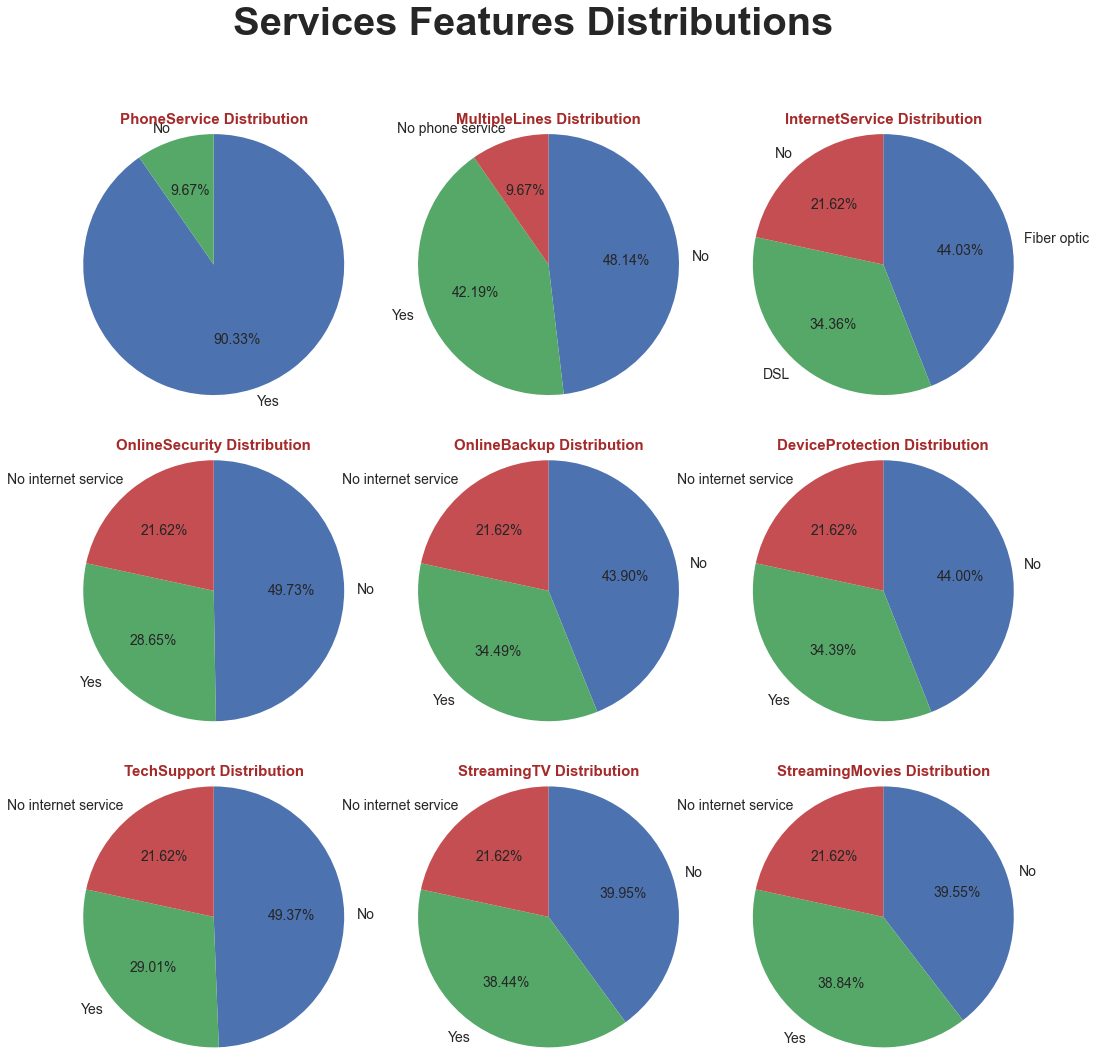

In [29]:
fig = plt.figure(figsize=(17, 17))
fig.suptitle('Services Features Distributions', fontsize=40, weight='bold')
for i, col in enumerate(Services_cols[:-1]):
    sorted_counts = churn_df[col].value_counts()
    plt.subplot(3, 3, i+1)
    plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct='%1.2f%%', 
                 counterclock = False, radius = 1.2, textprops={'fontsize': 14})
    plt.title(f'{col} Distribution',fontsize=15, weight='bold', color='brown', loc='center')

> Let's get the bivariate plots before jumping to any conclusions.

#### Bivariate Exploration

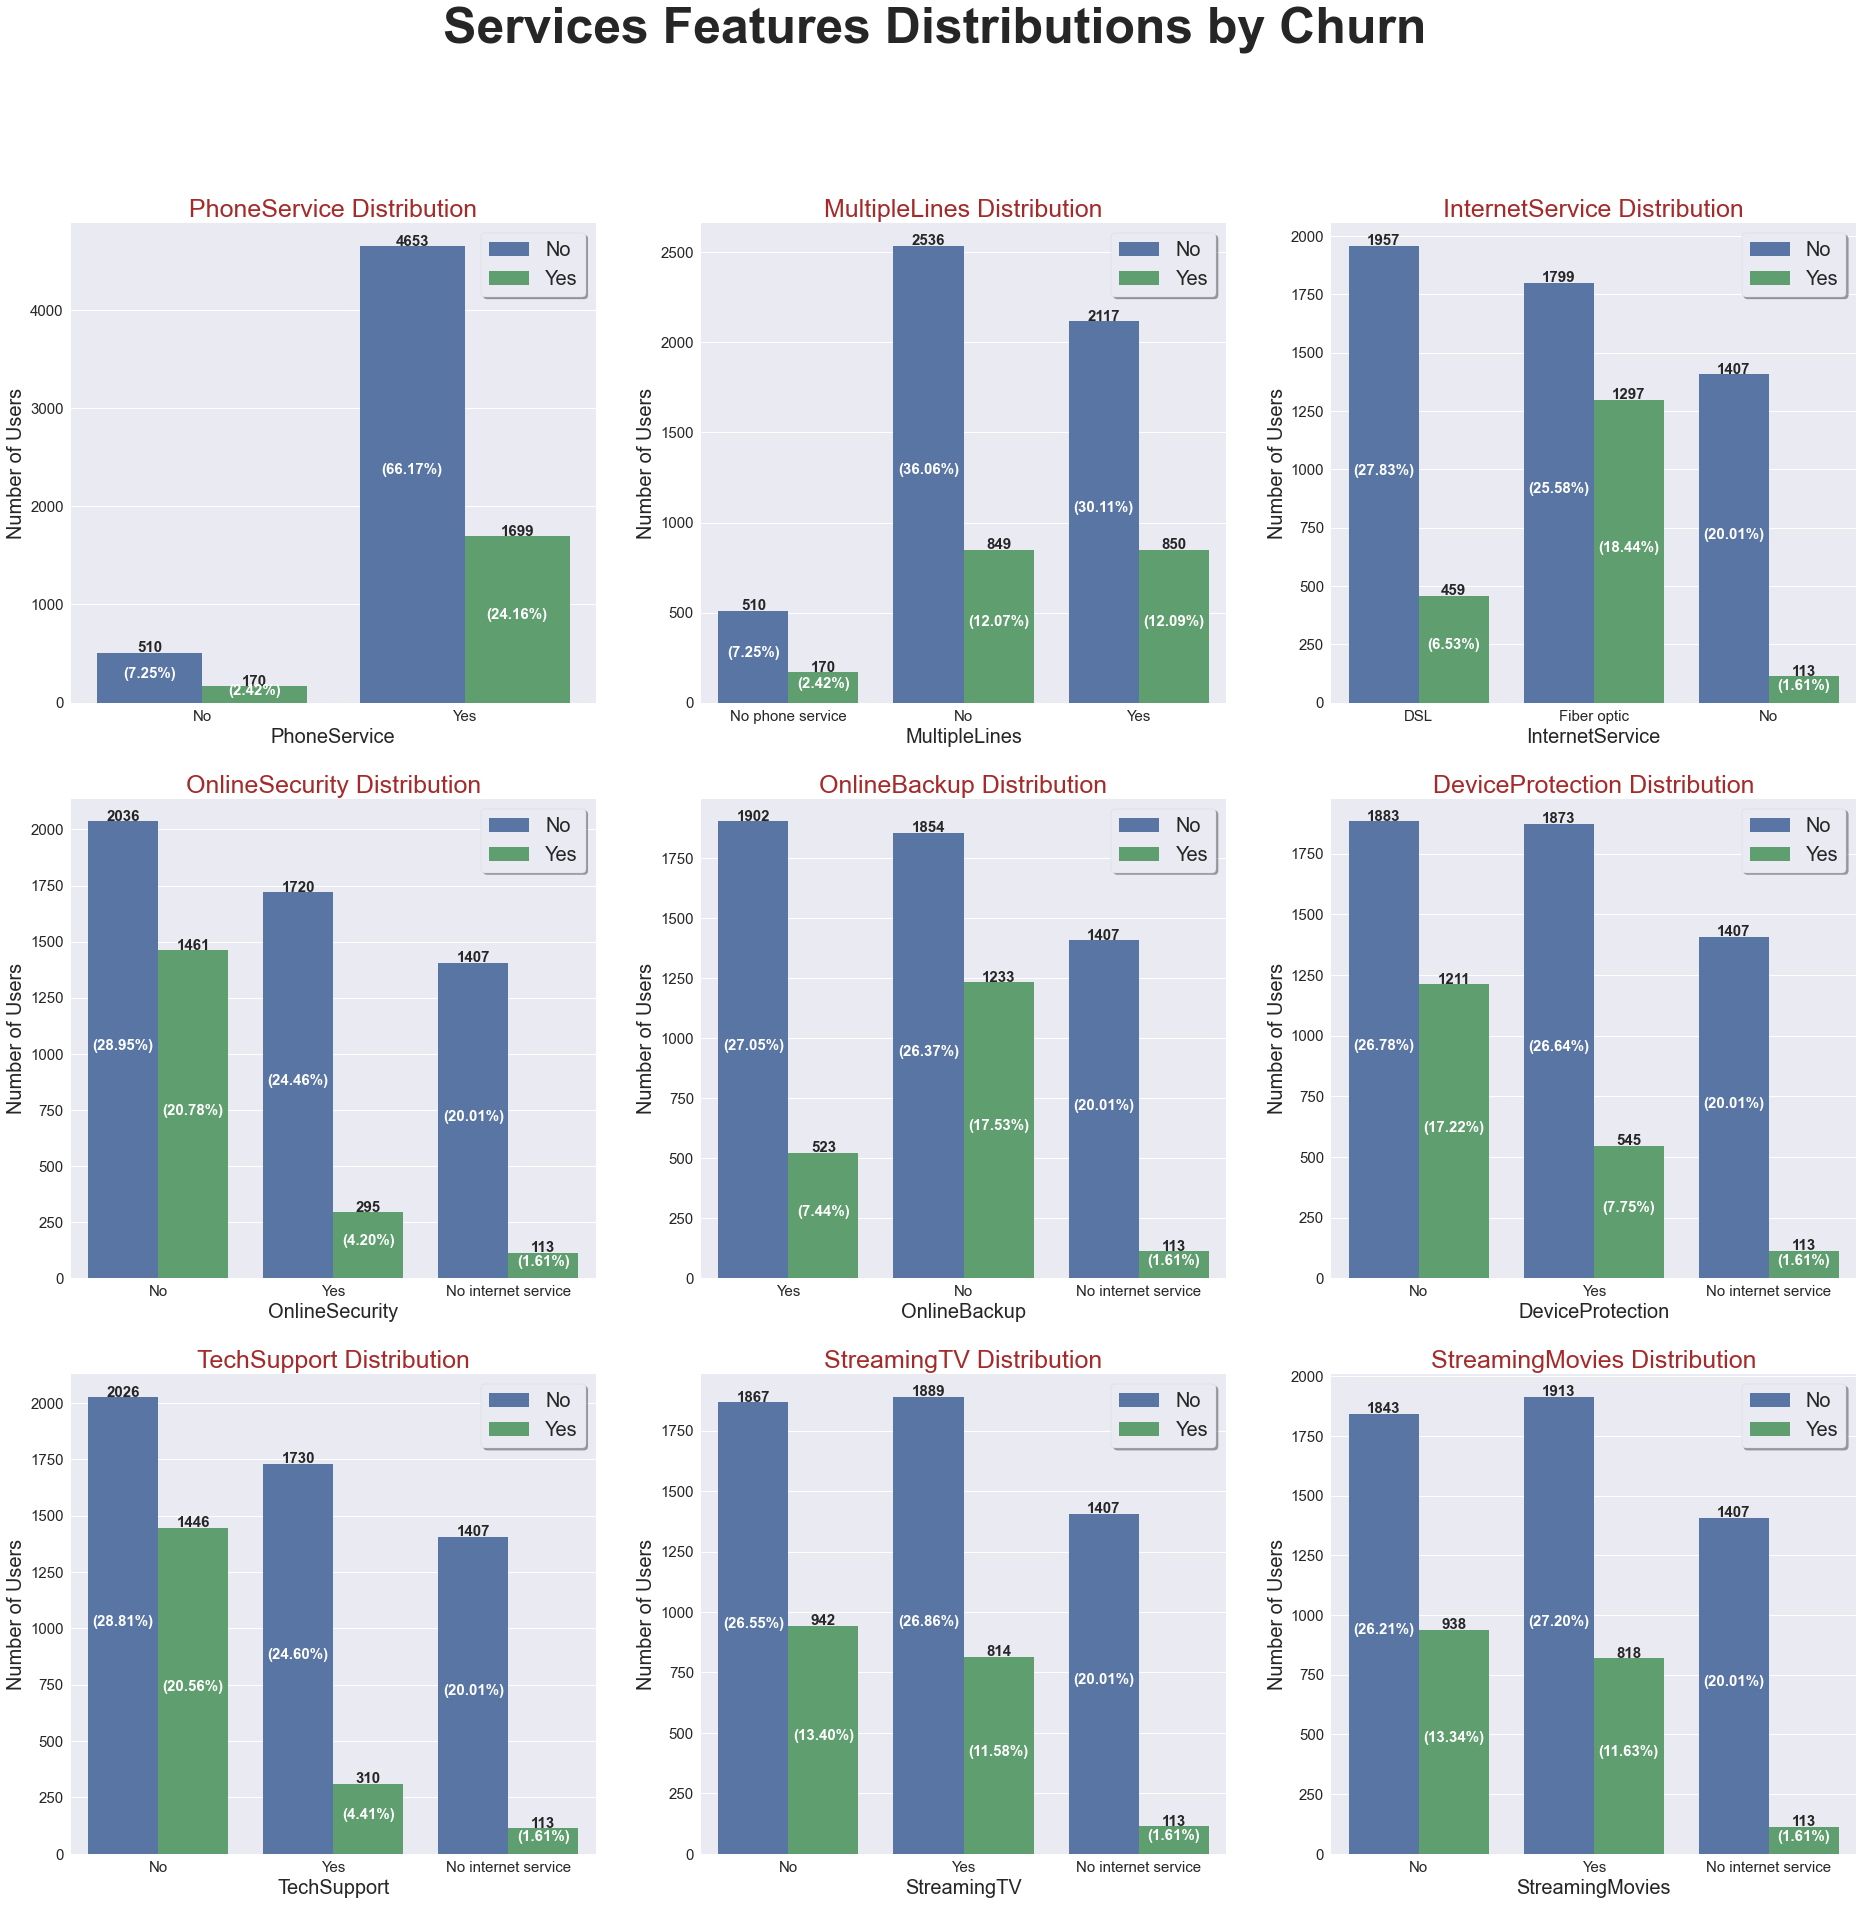

In [30]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (32,30))
fig.suptitle('Services Features Distributions by Churn', fontsize=50, weight='bold')
for i, col in enumerate(Services_cols[:-1]):
    CountPlot(churn_df[Services_cols], col, hue="Churn", ax=axes[i//3, i-(i//3)*3])

> **According to the univariate distibutions, we can't rely on only the numbers. We should get the rate of churn for each one of them so that we could compare ( as we did in the demographic distributions ):**
- The churn rate :
   - Is very close for both Clients who have phone service ($\frac{1699}{1699+4653} = {26.75}\% $) and who hasn't ($\frac{170}{170+510} = {25}\% $).
   - Is a little higher for Clients who have MultipleLines ($\frac{850}{850+2117} = {28.65}\% $) compared to other ones ($rate_{NoPhoneService}=\frac{170}{170+510} = {25}\% and rate_{No}=\frac{849}{849+2536} = {25.08}\%  $) May be it's expensive or something.
   - Is relatively high for Clients that use Fiber optic in their internet Service ($\frac{1297}{1297+1799} = {41.89}\% $).
   - Is relatively high for Clients that do not have Online Security, OnlineBackup, DeviceProtection,and TechSupport (41.78%, 39.94%, 39.14%,and 41.65% respectively).
   - Also it's a little higher for the clients who do not have StreamingTV or StreamingMovies.

### Feature Engineering For Services Features

In [31]:
# Phone Service
churn_df['PhoneService'] = np.where(churn_df['PhoneService']=='Yes', 1, 0)

# MultipleLines
churn_df['MultipleLines'] = np.where(churn_df['MultipleLines']=='Yes', 1, 0)

# Has Fiber optic 
churn_df['FiberOptic'] = np.where(churn_df['InternetService']=='Fiber optic', 1, 0)

# Has no services ( other than MultipleLines, StreamingTV,and StreamingMovies )
churn_df['NoServ'] = np.where((churn_df['OnlineSecurity'] != 'No') | (churn_df['OnlineBackup'] != 'No') |
                              (churn_df['DeviceProtection'] != 'No') | (churn_df['TechSupport'] != 'No'), 1, 0)

# StreamingTV,and StreamingMovies
churn_df['NoStream'] = np.where((churn_df['StreamingTV'] != 'No') | (churn_df['StreamingMovies'] != 'No'), 1, 0)
 
# number of services subscribed by each client
churn_df["SumOfIntServices"]=(churn_df.iloc[:, 6:12]=='Yes').sum(axis=1)

In [32]:
# Dropping....
churn_df.drop(columns=["InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", 
                       "TechSupport", "StreamingTV", "StreamingMovies"], inplace=True)

### Categorical Account Features...

#### Univariate Exploration

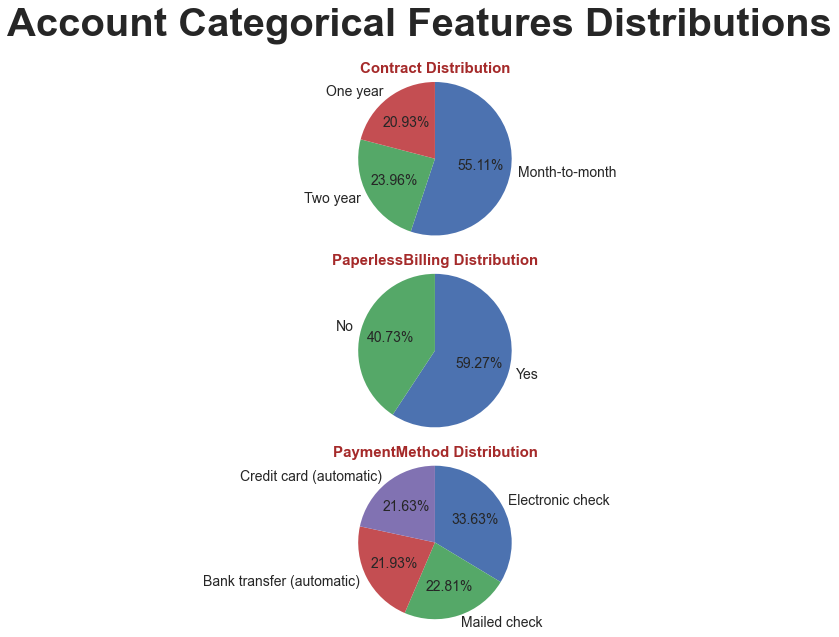

In [33]:
fig = plt.figure(figsize=(17, 10))
fig.suptitle('Account Categorical Features Distributions', fontsize=40, weight='bold')
for i, col in enumerate(Account_cols_cat[:-1]):
    sorted_counts = churn_df[col].value_counts()
    plt.subplot(3, 1, i+1)
    plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, autopct='%1.2f%%', 
                 counterclock = False, radius = 1.2, textprops={'fontsize': 14})
    plt.title(f'{col} Distribution',fontsize=15, weight='bold', color='brown', loc='center')

>To Complete our story, Let's go to Bivariate Exploration.

#### Bivariate Exploration

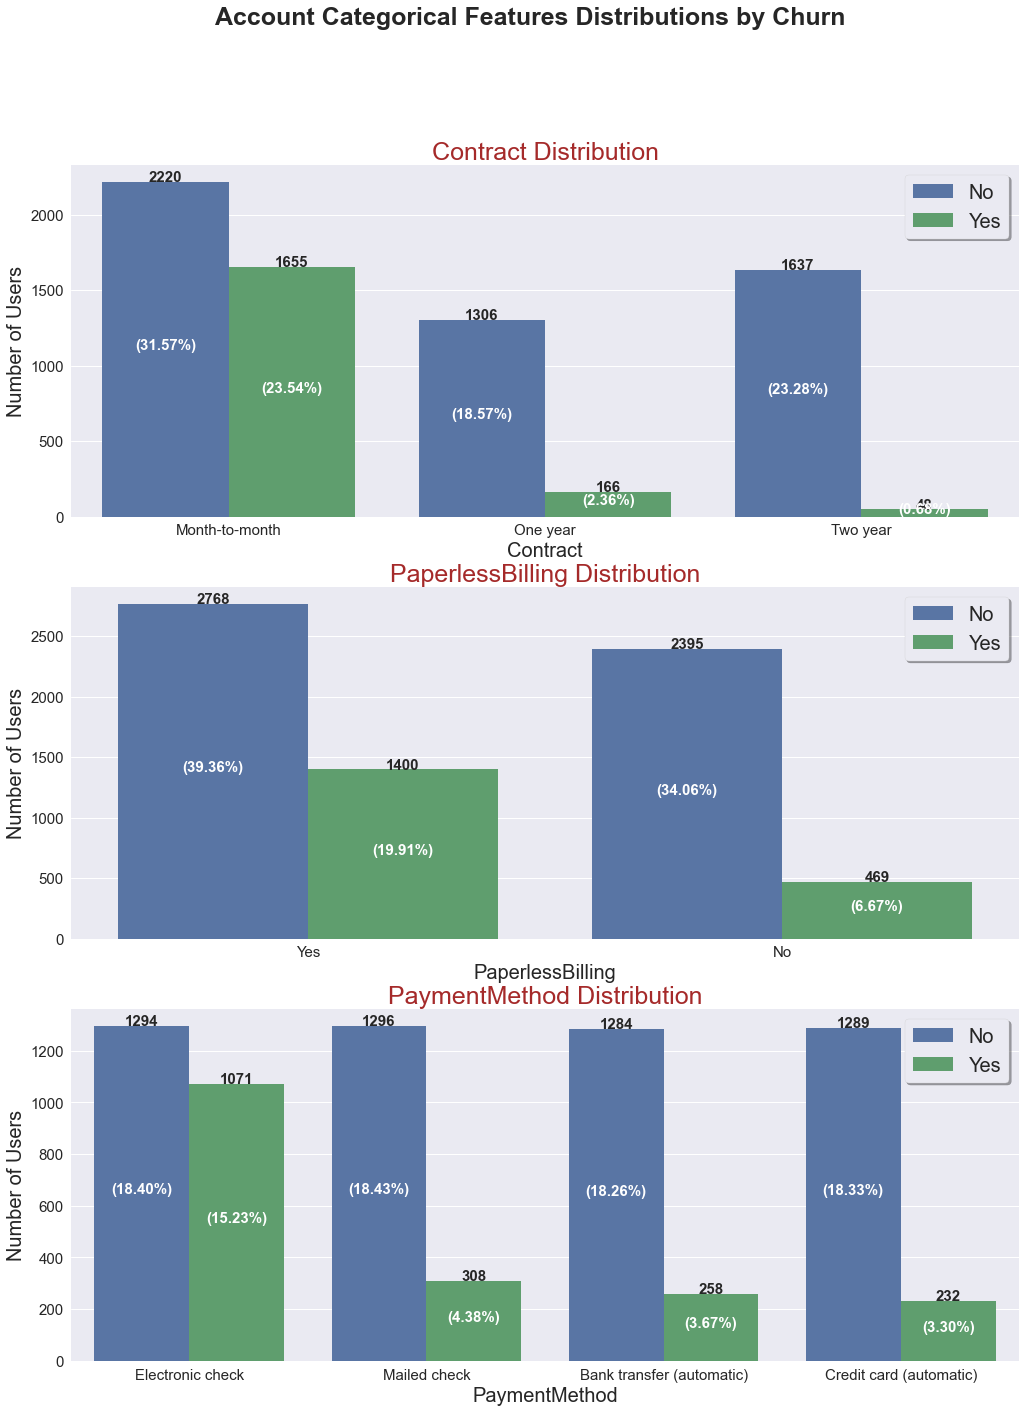

In [34]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (17,22))
fig.suptitle('Account Categorical Features Distributions by Churn', fontsize=25, weight='bold')
for i, col in enumerate(Account_cols_cat[:-1]):
    CountPlot(churn_df[Account_cols_cat], col, hue="Churn", ax=axes[i])

> **We can see that:**
- Churn rate is :
   - Is high for Clients that has a month-to-month contract ($\frac{1655}{1655+2220} = {42.71}\% $). That is reasonable by the way as he could make the contract more than that if he intended to stay longer.
   - Is high for Clients that has paperless billing ($\frac{1400}{1400+2768} = {33.59}\% $). Maybe there is a problem in the website or something.
   - Is very high for Clients that pay by electronic check ($\frac{1071}{1071+1294} = {45.29}\% $). May be the GUI or the website is not good enough.

### Feature Engineering...

In [35]:
# According to the above note....
churn_df['MonthToMonth'] = np.where((churn_df['Contract'] == 'Month-to-month'), 1,0)
churn_df['PaperlessBilling'] = np.where((churn_df['PaperlessBilling'] == 'Yes'), 1,0)
churn_df['ElectronicCheck'] = np.where((churn_df['PaymentMethod'] == 'Electronic check'), 1,0)

In [36]:
# Dropping...
churn_df.drop(columns=['Contract', 'PaymentMethod'], inplace=True)

### Numerical Account Features...

#### Univariate Exploration

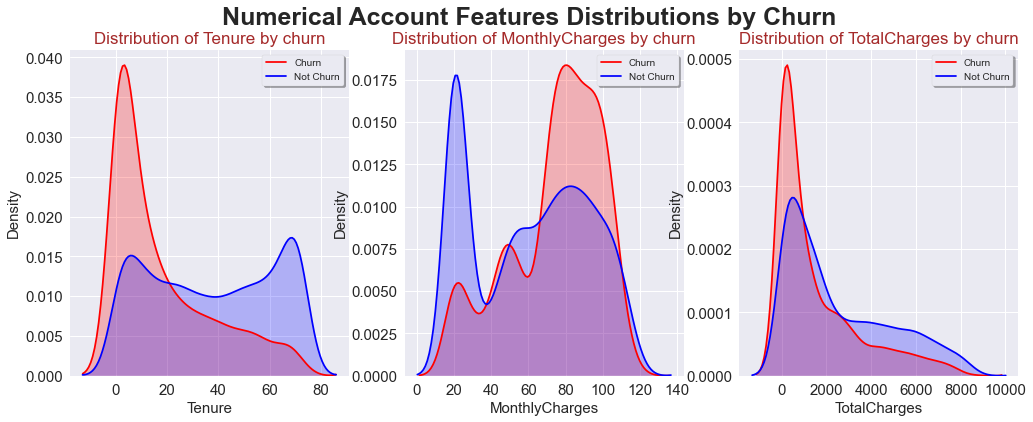

In [37]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (17,6))
fig.suptitle('Numerical Account Features Distributions by Churn', fontsize=25, weight='bold')
for i in range(3):
    kdeplot_churn(churn_df, Account_cols_num[i], ax=axes[i])

> We can see that:
 - if the client stayed from 0 to nearly 20 months only he is more likely to churn.
 - if the monthly charges is between 60 to 120 dollars he is more likely to churn
 - there is a little difference between the two density curves for the total charges.

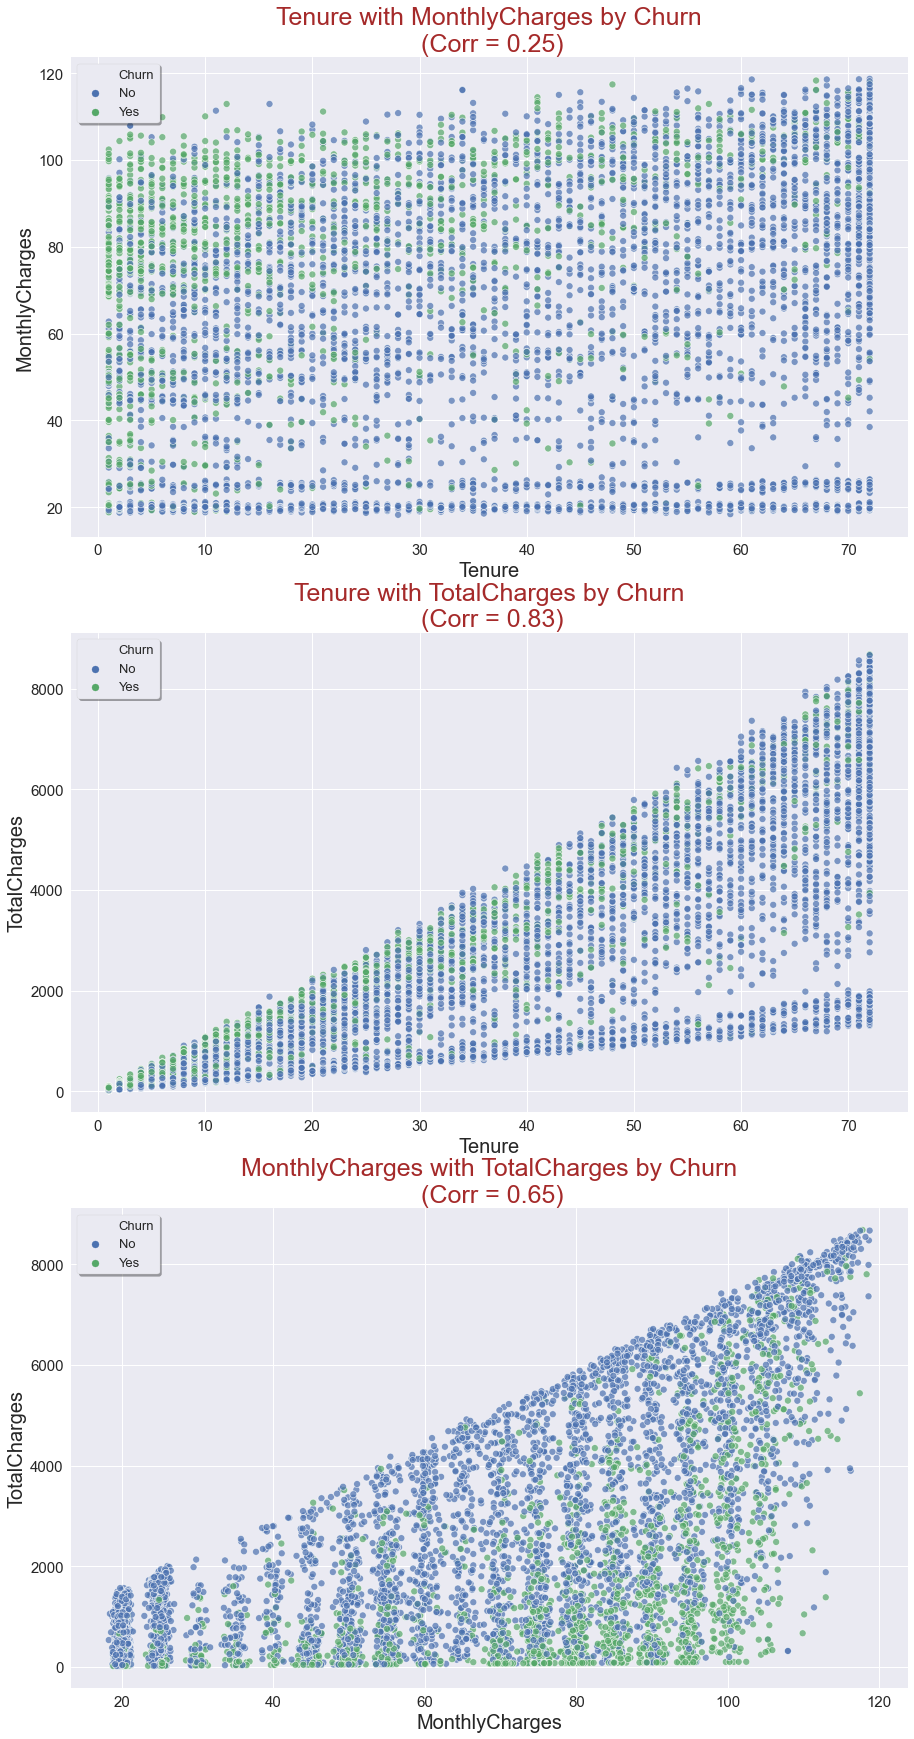

In [38]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (15,30))
combs = list(combinations(Account_cols_num[:-1], 2))
for i in range(3):
    ScatterPlot(churn_df, combs[i][0], combs[i-3][1], hue=Account_cols_num[-1], ax=axes[i])

> **We can see that:**
- _From the scatter plot:_
    - There is no specific pattern between Tenure and MonthlyCharges.
    - But we do see that there is a correlation between TotalCharges with both of MonthlyCharges and Tenure, which is reasonable by the way. So i will take only the tenure and monthly charges and drop the total charges.


### Feature Engineering...

In [39]:
pd.qcut(churn_df["MonthlyCharges"],3).unique()  

[(18.249, 50.4], (50.4, 84.0], (84.0, 118.75]]
Categories (3, interval[float64]): [(18.249, 50.4] < (50.4, 84.0] < (84.0, 118.75]]

In [40]:
# According to the above notes...
churn_df["tenure_L20"]=pd.qcut(churn_df["Tenure"],3)                       # 3 to get one of the categories (0.999, 14.0]   
churn_df["MonthlyCharges_60_120"] = pd.qcut(churn_df["MonthlyCharges"],3)  # 3 to get one of the categories (84.0, 118.75]

In [41]:
# Dropping 
churn_df.drop(columns=["Tenure", "MonthlyCharges", "TotalCharges"], inplace=True)

<a id='finale'></a>
## Final Touch

In [42]:
churn_df.head()

,Gender,SeniorCitizen,PhoneService,MultipleLines,PaperlessBilling,Churn,NoDep_NoPart,FiberOptic,NoServ,NoStream,SumOfIntServices,MonthToMonth,ElectronicCheck,tenure_L20,MonthlyCharges_60_120
0,0,0,0,0,1,No,1,0,1,0,1,1,1,"(0.999, 14.0]","(18.249, 50.4]"
1,1,0,1,0,0,No,1,0,1,0,2,0,0,"(14.0, 47.0]","(50.4, 84.0]"
2,1,0,1,0,1,Yes,1,0,1,0,2,1,0,"(0.999, 14.0]","(50.4, 84.0]"
3,1,0,0,0,0,No,1,0,1,0,3,0,0,"(14.0, 47.0]","(18.249, 50.4]"
4,0,0,1,0,1,Yes,1,1,0,0,0,1,1,"(0.999, 14.0]","(50.4, 84.0]"


In [43]:
# To avoid get_dummies trap you should put drop_first = True
churn_df = pd.get_dummies(data=churn_df, columns=['tenure_L20', 'MonthlyCharges_60_120'], drop_first=True)

# As for Churn, we don't need LabelEncoder as it's only 'Yes' or 'No'
churn_df['Churn'] = np.where(churn_df['Churn']=='Yes', 1, 0)

**To check if i did something wrong**

In [44]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   Gender                                7032 non-null   int32
 1   SeniorCitizen                         7032 non-null   int32
 2   PhoneService                          7032 non-null   int32
 3   MultipleLines                         7032 non-null   int32
 4   PaperlessBilling                      7032 non-null   int32
 5   Churn                                 7032 non-null   int32
 6   NoDep_NoPart                          7032 non-null   int32
 7   FiberOptic                            7032 non-null   int32
 8   NoServ                                7032 non-null   int32
 9   NoStream                              7032 non-null   int32
 10  SumOfIntServices                      7032 non-null   int64
 11  MonthToMonth                          7032 

In [45]:
churn_df.isnull().sum()        

Gender                                  0
SeniorCitizen                           0
PhoneService                            0
MultipleLines                           0
PaperlessBilling                        0
Churn                                   0
NoDep_NoPart                            0
FiberOptic                              0
NoServ                                  0
NoStream                                0
SumOfIntServices                        0
MonthToMonth                            0
ElectronicCheck                         0
tenure_L20_(14.0, 47.0]                 0
tenure_L20_(47.0, 72.0]                 0
MonthlyCharges_60_120_(50.4, 84.0]      0
MonthlyCharges_60_120_(84.0, 118.75]    0
dtype: int64

In [46]:
churn_df.shape

(7032, 17)

<font color='green'>
<h2><center> Hoooooraaaay, It is time for Modeling :) </center></h2>

<a id='unbal'></a>
<font color='red'>
<h2><center> Unbalanced Data <center\><h>

#### 1- First let's split the feature ( X ) from the target ( Y )

In [47]:
x = churn_df.drop(columns='Churn')
y = churn_df['Churn']

#### 2- Splitting the data to training and testing sets

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

#### 3- Scaling Transformation

In [49]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#### 4- Building our Models

- **Note:** Why here we care about precision ?. Because if the model predicts that a client has left the company but he actually hasn't (FP), that is very bad for the company.

In [50]:
def get_precision(y_test, y_pred):
    CM = confusion_matrix(y_test, y_pred)
    TP = CM[1,1]
    FP = CM[0,1]
    precision = TP/(TP+FP)
    
    return precision

_Logistic Regression_

In [51]:
lg_model = LogisticRegression(random_state=0)
lg_model.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [52]:
lg_acc = lg_model.score(x_test, y_test)
print("The logistic Regression model score on train set is: {}".format(lg_model.score(x_train, y_train)))  # To test Overfitting
print("The logistic Regression model score on test set is: {}".format(lg_acc))

The logistic Regression model score on train set is: 0.7987555555555556
The logistic Regression model score on test set is: 0.8045486851457001


In [53]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1038
           1       0.67      0.51      0.58       369

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.80      1407



_KNN_

In [54]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [55]:
knn_acc = knn_model.score(x_test, y_test)
print("The KNN model score on train set is: {}".format(knn_model.score(x_train, y_train)))    
print("The KNN model score on test set is: {}".format(knn_acc))

The KNN model score on train set is: 0.8200888888888889
The KNN model score on test set is: 0.7789623312011372


> It seems that this model is slightly overfitting the data.

In [56]:
y_pred = knn_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1038
           1       0.59      0.52      0.55       369

    accuracy                           0.78      1407
   macro avg       0.71      0.70      0.70      1407
weighted avg       0.77      0.78      0.77      1407



_Decision Tree_

In [57]:
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [58]:
dt_acc = dt_model.score(x_test, y_test)
print("The Decision Tree model score on train set is: {}".format(dt_model.score(x_train, y_train)))
print("The Decision Tree model score on test set is: {}".format(dt_acc))

The Decision Tree model score on train set is: 0.8764444444444445
The Decision Tree model score on test set is: 0.767590618336887


> Also here there is an overfitting

In [59]:
y_pred = dt_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85      1038
           1       0.57      0.44      0.50       369

    accuracy                           0.77      1407
   macro avg       0.70      0.66      0.67      1407
weighted avg       0.75      0.77      0.76      1407



**Let's see if we can make it better and get higher precision...**

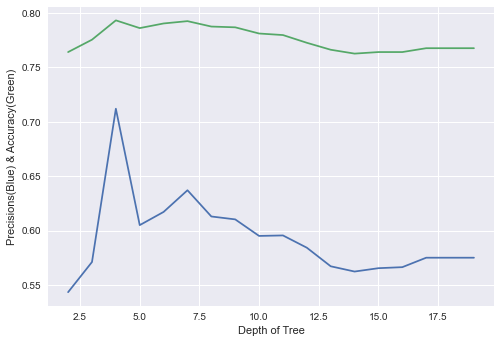

In [60]:
# Create for loop to prune tree
precisions = []
accuracies = []
d_range = range(2, 20) 
for d in d_range:
    tree = DecisionTreeClassifier(random_state=0, max_depth=d)
    tree.fit(x_train, y_train)
    y_pred = tree.predict(x_test)
    precisions.append(get_precision(y_test, y_pred))
    accuracies.append(tree.score(x_test, y_test))
    
# Plot graph to see how individual accuracy scores changes with tree depth
plt.plot(d_range, precisions)
plt.plot(d_range, accuracies)
plt.xlabel("Depth of Tree")
plt.ylabel("Precisions(Blue) & Accuracy(Green)");

In [61]:
precisions

[0.5433255269320844,
 0.5710455764075067,
 0.7119565217391305,
 0.6049382716049383,
 0.6170886075949367,
 0.6370106761565836,
 0.6129032258064516,
 0.610223642172524,
 0.5950155763239875,
 0.5954692556634305,
 0.584192439862543,
 0.5671140939597316,
 0.5622775800711743,
 0.5653710247349824,
 0.5663082437275986,
 0.575,
 0.575,
 0.575]

> I think the best value here is max_depth = 4

In [62]:
dt_model = DecisionTreeClassifier(random_state=0, max_depth=4)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [63]:
dt_acc = dt_model.score(x_test, y_test)
print("The Decision Tree model score on train set is: {}".format(dt_model.score(x_train, y_train)))
print("The Decision Tree model score on test set is: {}".format(dt_acc))

The Decision Tree model score on train set is: 0.7893333333333333
The Decision Tree model score on test set is: 0.7931769722814499


In [64]:
y_pred = dt_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      1038
           1       0.71      0.36      0.47       369

    accuracy                           0.79      1407
   macro avg       0.76      0.65      0.67      1407
weighted avg       0.78      0.79      0.77      1407



_Random Forest_

In [65]:
rf_model = RandomForestClassifier(oob_score=True, random_state=0, warm_start=True, n_jobs=-1)
rf_model.fit(x_train, y_train)

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=0,
                       warm_start=True)

In [66]:
rf_acc = rf_model.score(x_test, y_test)
print("The Decision Tree model score on train set is: {}".format(rf_model.score(x_train, y_train)))
print("The Decision Tree model score on test set is: {}".format(rf_acc))

The Decision Tree model score on train set is: 0.8764444444444445
The Decision Tree model score on test set is: 0.7711442786069652


In [67]:
y_pred = rf_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1038
           1       0.58      0.48      0.52       369

    accuracy                           0.77      1407
   macro avg       0.70      0.68      0.69      1407
weighted avg       0.76      0.77      0.76      1407



**Some Prunning**

In [68]:
rf_model = RandomForestClassifier(oob_score=True, random_state=0, warm_start=True, n_jobs=-1)

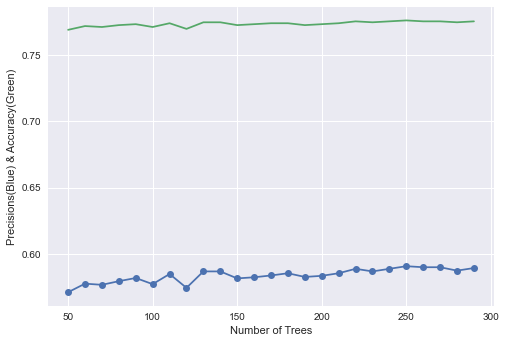

In [69]:
precisions = []
accuracies = []
# Iterate through all of the possibilities for the number of trees
n_range = range(50, 300, 10)
for n_trees in n_range:
    rf_model.set_params(n_estimators=n_trees)  # Set number of trees
    rf_model.fit(x_train, y_train)
    y_pred = rf_model.predict(x_test)
    precisions.append(get_precision(y_test, y_pred))
    accuracies.append(rf_model.score(x_test, y_test))

plt.plot(n_range, precisions, marker='o')
plt.plot(n_range, accuracies)
plt.xlabel("Number of Trees")
plt.ylabel("Precisions(Blue) & Accuracy(Green)");

In [70]:
precisions

[0.5709677419354838,
 0.5774193548387097,
 0.5765472312703583,
 0.5792880258899676,
 0.5816993464052288,
 0.5770491803278689,
 0.584717607973422,
 0.5742574257425742,
 0.5866666666666667,
 0.5866666666666667,
 0.5813953488372093,
 0.5822368421052632,
 0.5836065573770491,
 0.5852842809364549,
 0.5824915824915825,
 0.5833333333333334,
 0.5852842809364549,
 0.5886287625418061,
 0.5866666666666667,
 0.5886287625418061,
 0.5906040268456376,
 0.5898305084745763,
 0.5898305084745763,
 0.587248322147651,
 0.5892255892255892]

> I think n_estimators = 250 is the best number

<font color='green'>
Best Random Forest

In [71]:
rf_model = RandomForestClassifier(n_estimators=250, oob_score=True, random_state=0, warm_start=True, n_jobs=-1)
rf_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=250, n_jobs=-1, oob_score=True,
                       random_state=0, warm_start=True)

In [72]:
rf_acc = rf_model.score(x_test, y_test)
print("The Decision Tree model score on train set is: {}".format(rf_model.score(x_train, y_train)))
print("The Decision Tree model score on test set is: {}".format(rf_acc))

The Decision Tree model score on train set is: 0.8764444444444445
The Decision Tree model score on test set is: 0.7761194029850746


> Overfitting again.

In [73]:
y_pred = rf_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1038
           1       0.59      0.48      0.53       369

    accuracy                           0.78      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.76      0.78      0.77      1407



_SVM_

In [74]:
svm_model = SVC(random_state=0)
svm_model.fit(x_train, y_train)

SVC(random_state=0)

In [75]:
svm_acc = svm_model.score(x_test, y_test)
print("The Decision Tree model score on train set is: {}".format(svm_model.score(x_train, y_train)))
print("The Decision Tree model score on test set is: {}".format(svm_acc))

The Decision Tree model score on train set is: 0.8099555555555555
The Decision Tree model score on test set is: 0.8088130774697939


In [76]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1038
           1       0.68      0.51      0.58       369

    accuracy                           0.81      1407
   macro avg       0.76      0.71      0.73      1407
weighted avg       0.80      0.81      0.80      1407



<a id='bal'></a>
<font color='green'>
<h2><center> Balanced Data <center\><h>

**UpSampling**

In [77]:
churn_df['Churn'].value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [78]:
# Separate majority and minority classes
df_majority = churn_df[churn_df.Churn==0]
df_minority = churn_df[churn_df.Churn==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=5163,   # to match majority class
                                 random_state=0)   # reproducible results
 
# Combine majority class with upsampled minority class
churn_df_up = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
churn_df_up.Churn.value_counts()

1    5163
0    5163
Name: Churn, dtype: int64

_Cross-Validation & Scaling_

In [79]:
x = churn_df_up.drop(columns='Churn')
y = churn_df_up['Churn']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**Models**

_Logistic Regression_

In [80]:
lg_model = LogisticRegression(random_state=0)
lg_model.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [81]:
lg_acc = lg_model.score(x_test, y_test)
print("The logistic Regression model score on train set is: {}".format(lg_model.score(x_train, y_train)))  # To test Overfitting
print("The logistic Regression model score on test set is: {}".format(lg_acc))

The logistic Regression model score on train set is: 0.7675544794188862
The logistic Regression model score on test set is: 0.755566311713456


In [82]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.72      0.74      1018
           1       0.75      0.79      0.77      1048

    accuracy                           0.76      2066
   macro avg       0.76      0.76      0.76      2066
weighted avg       0.76      0.76      0.76      2066



_KNN_

In [83]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [84]:
knn_acc = knn_model.score(x_test, y_test)
print("The KNN model score on train set is: {}".format(knn_model.score(x_train, y_train)))    
print("The KNN model score on test set is: {}".format(knn_acc))

The KNN model score on train set is: 0.8134382566585956
The KNN model score on test set is: 0.7575024201355276


In [85]:
y_pred = knn_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.71      0.74      1018
           1       0.74      0.81      0.77      1048

    accuracy                           0.76      2066
   macro avg       0.76      0.76      0.76      2066
weighted avg       0.76      0.76      0.76      2066



_Decision Tree_

In [86]:
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

In [87]:
dt_acc = dt_model.score(x_test, y_test)
print("The Decision Tree model score on train set is: {}".format(dt_model.score(x_train, y_train)))
print("The Decision Tree model score on test set is: {}".format(dt_acc))

The Decision Tree model score on train set is: 0.8725181598062954
The Decision Tree model score on test set is: 0.792352371732817


In [88]:
y_pred = dt_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79      1018
           1       0.79      0.81      0.80      1048

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066



_Random Forest_

In [89]:
rf_model = RandomForestClassifier(n_estimators=250, oob_score=True, random_state=0, warm_start=True, n_jobs=-1)
rf_model.fit(x_train, y_train)

RandomForestClassifier(n_estimators=250, n_jobs=-1, oob_score=True,
                       random_state=0, warm_start=True)

In [90]:
rf_acc = rf_model.score(x_test, y_test)
print("The Decision Tree model score on train set is: {}".format(rf_model.score(x_train, y_train)))
print("The Decision Tree model score on test set is: {}".format(rf_acc))

The Decision Tree model score on train set is: 0.8725181598062954
The Decision Tree model score on test set is: 0.8117134559535334


> Overfitting !

In [91]:
y_pred = rf_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.78      0.80      1018
           1       0.80      0.84      0.82      1048

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066



_SVM_

In [92]:
svm_model = SVC(random_state=0)
svm_model.fit(x_train, y_train)

SVC(random_state=0)

In [93]:
svm_acc = svm_model.score(x_test, y_test)
print("The Decision Tree model score on train set is: {}".format(svm_model.score(x_train, y_train)))
print("The Decision Tree model score on test set is: {}".format(svm_acc))

The Decision Tree model score on train set is: 0.7906779661016949
The Decision Tree model score on test set is: 0.7671829622458858


In [94]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1018
           1       0.76      0.79      0.77      1048

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066



# Conclusion:
> As we can see the performance of every model has improved after Upsampling the data and because we care about the precision value so the best model from all of the above is the _Random Forest_ :
- Accuracy  = 81%
- **Precision = 80%**
- Recall    = 84%
- **F1-score  = 82%**